# Importing Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Load Data

In [3]:
df = pd.read_csv("./datasets/earthquake data.csv")
df

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,11/21/2023 17:43,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,11/21/2023 17:31,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,11/21/2023 17:27,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,11/21/2023 17:01,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,11/21/2023 16:56,-4.320,130.810,10,3.3,BANDA,SEA
...,...,...,...,...,...,...,...
53534,5/14/2023 9:50,18.080,-103.270,7,3.5,"OFFSHORE, MICHOACAN,",MEXICO
53535,5/14/2023 9:49,11.520,141.620,10,5.1,"STATE, OF, YAP,",MICRONESIA
53536,5/14/2023 9:48,19.400,-155.240,2,2.2,"ISLAND, OF, HAWAII,",HAWAII
53537,5/14/2023 9:28,15.890,-93.520,106,3.9,"CHIAPAS,",MEXICO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date & Time  53539 non-null  object 
 1   Latitude     53539 non-null  float64
 2   Longitude    53539 non-null  float64
 3   Depth        53539 non-null  int64  
 4   Magnitude    53539 non-null  float64
 5   Lands        53539 non-null  object 
 6   Country      53539 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [5]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date & Time  53539 non-null  datetime64[ns]
 1   Latitude     53539 non-null  float64       
 2   Longitude    53539 non-null  float64       
 3   Depth        53539 non-null  int64         
 4   Magnitude    53539 non-null  float64       
 5   Lands        53539 non-null  object        
 6   Country      53539 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 2.9+ MB


# Extracting numerical datetime features


In [7]:
df['Year'] = df['Date & Time'].dt.year
df['Month'] = df['Date & Time'].dt.month
df['Day'] = df['Date & Time'].dt.day
df['Hour'] = df['Date & Time'].dt.hour
df['Minute'] = df['Date & Time'].dt.minute

In [8]:
df.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country,Year,Month,Day,Hour,Minute
0,2023-11-21 17:43:00,31.592,-104.549,3,2.7,WESTERN,TEXAS,2023,11,21,17,43
1,2023-11-21 17:31:00,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA,2023,11,21,17,31
2,2023-11-21 17:27:00,31.647,-104.017,5,2.9,WESTERN,TEXAS,2023,11,21,17,27
3,2023-11-21 17:01:00,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA,2023,11,21,17,1
4,2023-11-21 16:56:00,-4.320,130.810,10,3.3,BANDA,SEA,2023,11,21,16,56


# One-hot encode categorical features

In [11]:
encoder = OneHotEncoder(sparse_output=False)
lands_encoded = encoder.fit_transform(df[['Lands']])
country_encoded = encoder.fit_transform(df[['Country']])

In [12]:
lands_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
country_encoded[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Combine features

In [14]:
X = np.hstack((df[['Latitude', 'Longitude', 'Magnitude', 'Year', 'Month', 'Day', 'Hour', 'Minute']].values, lands_encoded, country_encoded))
y = df['Depth'].values.reshape(-1, 1)

In [15]:
X.shape

(53539, 917)

In [16]:
X[0]

array([ 3.15920e+01, -1.04549e+02,  2.70000e+00,  2.02300e+03,
        1.10000e+01,  2.10000e+01,  1.70000e+01,  4.30000e+01,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.000

# Normalize the features


In [17]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_x.fit_transform(X)

In [18]:
X_scaled[0]

array([0.6446581 , 0.20956855, 0.4047619 , 0.        , 1.        ,
       0.66666667, 0.73913043, 0.72881356, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Normalize the target variable


In [19]:
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)

In [20]:
y_scaled[0]

array([0.00928382])

# Chronological split (e.g., 80% for training and 20% for testing)

In [21]:
split_index = int(len(df) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

# Reshape data for LSTM input [samples, time steps, features]


In [22]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [23]:
X_train.shape

(42831, 1, 917)

In [24]:
X_train[0]

array([[0.6446581 , 0.20956855, 0.4047619 , 0.        , 1.        ,
        0.66666667, 0.73913043, 0.72881356, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [25]:
X_test.shape

(10708, 1, 917)

# Build the LSTM model

In [26]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

c:\Users\DELL\anaconda3\envs\AI\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary() # This is Saeed. [55.053, 09.44433, 444.666632]

# [[0, 1, 1],
#  [22, 32, 4],
#  [32, 5, 64]]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │       193,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,651 (756.45 KB)

 Trainable params: 193,651 (756.45 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
# Define early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0049 - mae: 0.0358 - val_loss: 0.0037 - val_mae: 0.0318
Epoch 2/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0032 - mae: 0.0292 - val_loss: 0.0035 - val_mae: 0.0291
Epoch 3/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0031 - mae: 0.0283 - val_loss: 0.0035 - val_mae: 0.0300
Epoch 4/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0031 - mae: 0.0278 - val_loss: 0.0034 - val_mae: 0.0295
Epoch 5/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - loss: 0.0029 - mae: 0.0268 - val_loss: 0.0036 - val_mae: 0.0344
Epoch 6/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0029 - mae: 0.0269 - val_loss: 0.0034 - val_mae: 0.0288
Epoch 7/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0030 - mae: 0.0269 - val_loss: 0.0034 - val_mae: 0.0297
Epoch 8/50
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0030 - mae: 0.0269 - val_loss: 0.0034 - val_mae: 0.0293
Epoch 9/50
1339/1339 ━━━━━

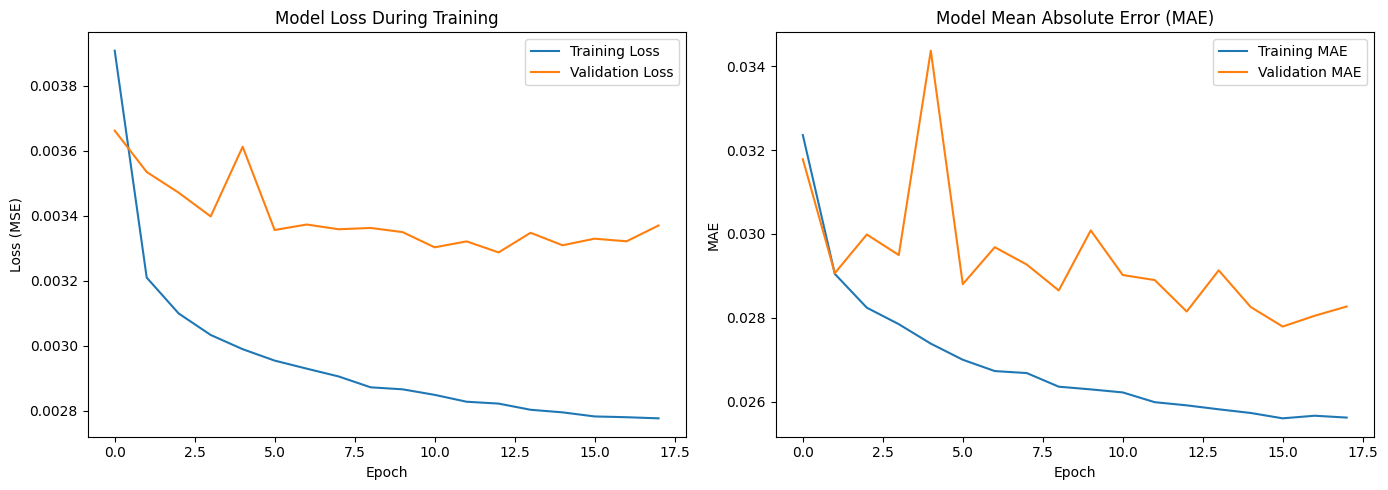

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

In [22]:
model.save('earthquake_depth_prediction_model.h5')
print("Model saved to earthquake_depth_prediction_model.h5")

Model saved to earthquake_depth_prediction_model.h5


# Evaluate the model

In [32]:
mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: [0.0033696633763611317, 0.0282688420265913]


335/335 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


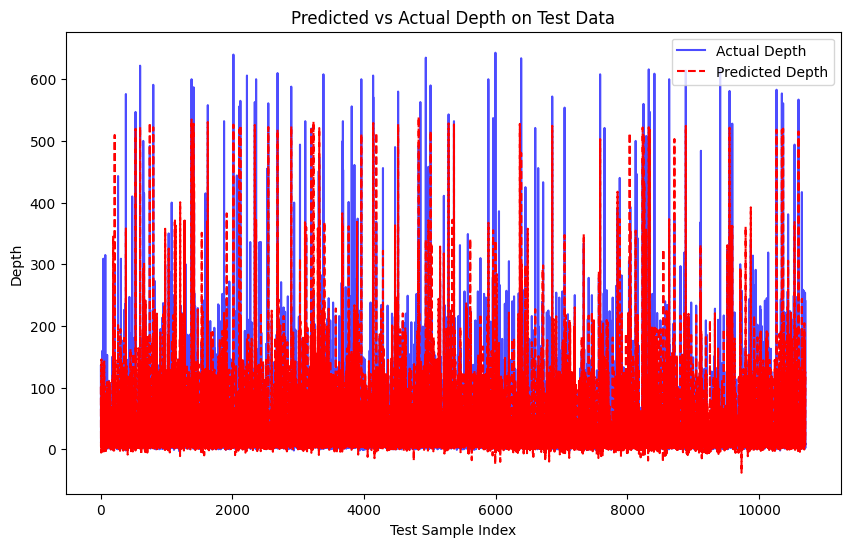

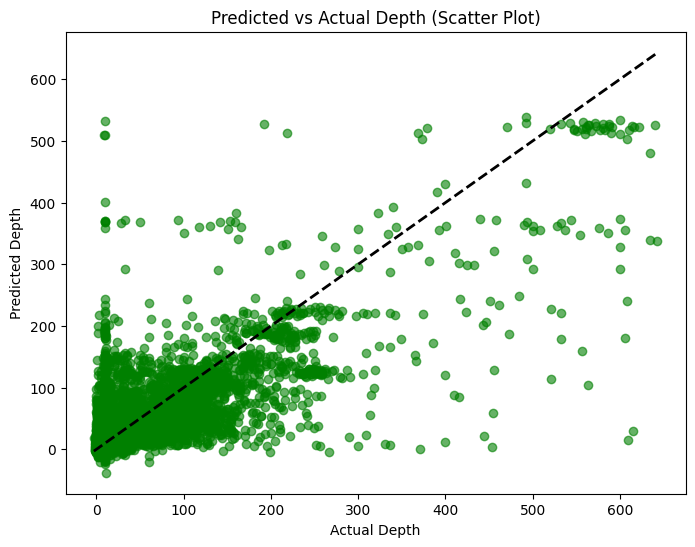

In [33]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse the scaling to get the actual values of predictions and test targets
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Plot the results: Predicted vs Actual Depth
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual Depth', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Depth', color='red', linestyle='--')
plt.title('Predicted vs Actual Depth on Test Data')
plt.xlabel('Test Sample Index')
plt.ylabel('Depth')
plt.legend()
plt.show()

# Scatter plot to see how well predictions align with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, alpha=0.6, color='green')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Depth (Scatter Plot)')
plt.xlabel('Actual Depth')
plt.ylabel('Predicted Depth')
plt.show()
